In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
!pip install bm3d

In [14]:
import bm3d

In [15]:
import numpy as np
import cv2 as cv
import glob
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

In [16]:
sz=50
xc=8
yc=58
def noisy(image):
      row,col= image.shape
      mean = 0
      var = 100
      sigma = var**0.5
      gauss = np.random.normal(mean,sigma,(row,col))
      gauss = gauss.reshape(row,col)
      noisy = image + gauss
      return noisy

In [30]:
#compare with denoised using ur specific SNR function or pre-defined PSNR 
def noise_removal(img):
    imgs=[]
    print("Original")
    cv2_imshow( img)

    #gaussian blur/filter
    gaussblur = cv.GaussianBlur(img,(3,3),0)
    imgs.append(gaussblur)
    plt.figure(figsize=(2,2))
    plt.imshow(np.resize(gaussblur,(sz,sz)),cmap="gray")
    plt.show()
    #cv.waitKey(0)
    gausspsnr = cv.PSNR(img, gaussblur)
    print("Gauss PSNR",gausspsnr)
    
    #averaging
    avgblur = cv.blur(img,(3,3))
    imgs.append(avgblur)
    cv2_imshow( avgblur)
    #cv.waitKey(0)
    avgpsnr = cv.PSNR(img, avgblur)
    print("avg PSNR",avgpsnr)
    
    # covolve with custom filter
    # kernel = np.ones((5,5),np.float32)/25
    # dst = cv.filter2D(img,-1,kernel)
    # dst=1
    # medianblur = cv.medianBlur(img,dst,3)
    # imgs.append(medianblur)
    # cv2_imshow( medianblur)
    # cv.waitKey(0)
    # print(type(img))
    # print(type(dst))
    # medpsnr = cv.PSNR(img.dtype, dst)
    # print("median PSNR",medpsnr)

    arr = np.uint8(img)
    h, w = arr.shape

    bilatblur = cv.bilateralFilter(arr,3,3,3)
    imgs.append(bilatblur)
    cv2_imshow( bilatblur)
    #cv.waitKey(0)
    bilatpsnr = cv.PSNR(arr, bilatblur)
    print("bilateral PSNR", bilatpsnr)
    
    
    #save rotated image on pc
    #cv.imwrite("imgrot"+str(angle)+".png", final)
    
    #save flattened img into csv
    #finalflat= final.flatten()/255.0
    #write this to excel
    #den=cv.fastNlMeansDenoising(arr)
    #imgs.append(den)
    #cv2_imshow(arr)
    den=bm3d.bm3d(img,15)
    imgs.append(den)
    cv2_imshow( den)
    bm3dPSNR = cv.PSNR(img, den)
    print("bm3d PSNR", bm3dPSNR)
    cv.waitKey(0)
    cv.destroyAllWindows()
    return np.asarray(imgs)

In [18]:

train_x_list=['drive/My Drive/tdata/rbc/5 (315).png',
 'drive/My Drive/tdata/rbc/5 (319).png',
 'drive/My Drive/tdata/rbc/5 (46).png',
 'drive/My Drive/tdata/rbc/5 (50).png',
 'drive/My Drive/tdata/rbc/5 (80).png',
 'drive/My Drive/tdata/rbc/5 (289).png',
 'drive/My Drive/tdata/rbc/5 (101).png',
 'drive/My Drive/tdata/rbc/5 (128).png',
 'drive/My Drive/tdata/rbc/5 (14).png',
 'drive/My Drive/tdata/rbc/5 (163).png',
 'drive/My Drive/tdata/rbc/5 (177).png',
 'drive/My Drive/tdata/rbc/5 (193).png',
 'drive/My Drive/tdata/rbc/5 (216).png',
 'drive/My Drive/tdata/rbc/5 (229).png',
 'drive/My Drive/tdata/rbc/5 (251).png',
 'drive/My Drive/tdata/rbc/5 (265).png',
 'drive/My Drive/tdata/rbc/5 (292).png',
 'drive/My Drive/tdata/HepG2/3 (23).png',
 'drive/My Drive/tdata/HepG2/3 (41).png',
 'drive/My Drive/tdata/HepG2/3 (58).png',
 'drive/My Drive/tdata/MCF7/4 (18).png',
 'drive/My Drive/tdata/MCF7/4 (40).png',
 'drive/My Drive/tdata/MCF7/4 (54).png',
 'drive/My Drive/tdata/10/1 (116).png',
 'drive/My Drive/tdata/10/1 (134).png',
 'drive/My Drive/tdata/10/1 (147).png',
 'drive/My Drive/tdata/10/1 (163).png',
 'drive/My Drive/tdata/10/1 (184).png',
 'drive/My Drive/tdata/10/1 (30).png',
 'drive/My Drive/tdata/10/1 (53).png',
 'drive/My Drive/tdata/10/1 (68).png',
 'drive/My Drive/tdata/10/1 (9).png',
 'drive/My Drive/tdata/20/2 (100).png',
 'drive/My Drive/tdata/20/2 (122).png',
 'drive/My Drive/tdata/20/2 (142).png',
 'drive/My Drive/tdata/20/2 (161).png',
 'drive/My Drive/tdata/20/2 (173).png',
 'drive/My Drive/tdata/20/2 (191).png',
 'drive/My Drive/tdata/20/2 (212).png',
 'drive/My Drive/tdata/20/2 (230).png',
 'drive/My Drive/tdata/20/2 (38).png',
 'drive/My Drive/tdata/20/2 (50).png',
 'drive/My Drive/tdata/20/2 (71).png',
 'drive/My Drive/tdata/20/2 (9).png',
 'drive/My Drive/tdata/cd4/6 (106).png',
 'drive/My Drive/tdata/cd4/6 (122).png',
 'drive/My Drive/tdata/cd4/6 (146).png',
 'drive/My Drive/tdata/cd4/6 (16).png',
 'drive/My Drive/tdata/cd4/6 (18).png',
 'drive/My Drive/tdata/cd4/6 (198).png',
 'drive/My Drive/tdata/cd4/6 (212).png',
 'drive/My Drive/tdata/cd4/6 (233).png',
 'drive/My Drive/tdata/cd4/6 (251).png',
 'drive/My Drive/tdata/cd4/6 (267).png',
 'drive/My Drive/tdata/cd4/6 (291).png',
 'drive/My Drive/tdata/cd4/6 (309).png',
 'drive/My Drive/tdata/cd4/6 (323).png',
 'drive/My Drive/tdata/cd4/6 (344).png',
 'drive/My Drive/tdata/cd4/6 (359).png',
 'drive/My Drive/tdata/cd4/6 (55).png',
 'drive/My Drive/tdata/cd4/6 (72).png',
 'drive/My Drive/tdata/cd4/6 (88).png',
 'drive/My Drive/tdata/cd8/7 (107).png',
 'drive/My Drive/tdata/cd8/7 (127).png',
 'drive/My Drive/tdata/cd8/7 (146).png',
 'drive/My Drive/tdata/cd8/7 (162).png',
 'drive/My Drive/tdata/cd8/7 (177).png',
 'drive/My Drive/tdata/cd8/7 (201).png',
 'drive/My Drive/tdata/cd8/7 (217).png',
 'drive/My Drive/tdata/cd8/7 (233).png',
 'drive/My Drive/tdata/cd8/7 (4).png',
 'drive/My Drive/tdata/cd8/7 (61).png',
 'drive/My Drive/tdata/cd8/7 (8).png',
 'drive/My Drive/tdata/cd8/7 (95).png']
#random.shuffle(train_x_list)
print(train_x_list)
train_images=[]
train_lis = []
x_list = []
train_lis_auginp = []
noise=[]
noise_test = []
for i in range(len(train_x_list)):
    x_list.append(cv2.imread(train_x_list[i],0)[xc:yc,xc:yc].flatten())
'''  #else:
    #a = cv2.imread(train_x_list[i],0)
if(train_x_list[i].split('/')[3]=='HepG2' or train_x_list[i].split('/')[3]=='MCF7'):
      for ag in img_augmentor(a):
        #train_lis_auginp.append(ag[xc:yc,xc:yc])
        train_images.append(ag[xc:yc,xc:yc].flatten())
    else:
      train_lis_auginp.append(a[xc:yc,xc:yc])
      train_images.append(a[xc:yc,xc:yc].flatten())'''
'''#noise.append(noisy(cv2.imread(train_x_list[i],0))[11:55,11:55].flatten())
    #cv2_imshow(np.resize(noise[i],(44,44)))'''
#saving input list before conv to np array
#train_lis = train_images
#train_images=np.array(train_images)
#x_list contains test images and train_lis contains train images
#print(train_images.shape)

#print(train_images)

['drive/My Drive/tdata/rbc/5 (315).png', 'drive/My Drive/tdata/rbc/5 (319).png', 'drive/My Drive/tdata/rbc/5 (46).png', 'drive/My Drive/tdata/rbc/5 (50).png', 'drive/My Drive/tdata/rbc/5 (80).png', 'drive/My Drive/tdata/rbc/5 (289).png', 'drive/My Drive/tdata/rbc/5 (101).png', 'drive/My Drive/tdata/rbc/5 (128).png', 'drive/My Drive/tdata/rbc/5 (14).png', 'drive/My Drive/tdata/rbc/5 (163).png', 'drive/My Drive/tdata/rbc/5 (177).png', 'drive/My Drive/tdata/rbc/5 (193).png', 'drive/My Drive/tdata/rbc/5 (216).png', 'drive/My Drive/tdata/rbc/5 (229).png', 'drive/My Drive/tdata/rbc/5 (251).png', 'drive/My Drive/tdata/rbc/5 (265).png', 'drive/My Drive/tdata/rbc/5 (292).png', 'drive/My Drive/tdata/HepG2/3 (23).png', 'drive/My Drive/tdata/HepG2/3 (41).png', 'drive/My Drive/tdata/HepG2/3 (58).png', 'drive/My Drive/tdata/MCF7/4 (18).png', 'drive/My Drive/tdata/MCF7/4 (40).png', 'drive/My Drive/tdata/MCF7/4 (54).png', 'drive/My Drive/tdata/10/1 (116).png', 'drive/My Drive/tdata/10/1 (134).png', 'd

'#noise.append(noisy(cv2.imread(train_x_list[i],0))[11:55,11:55].flatten())\n    #cv2_imshow(np.resize(noise[i],(44,44)))'

74
Original


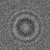

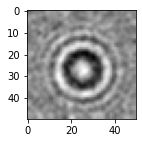

Gauss PSNR 29.201290114178068


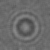

avg PSNR 27.73269965034831


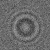

bilateral PSNR 49.97502612543643


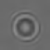

bm3d PSNR 27.602225949493274
Original


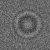

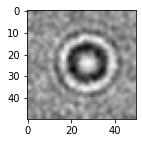

Gauss PSNR 29.40897273590942


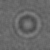

avg PSNR 27.908846346527984


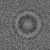

bilateral PSNR 49.77516609198814


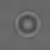

bm3d PSNR 27.64558439107048
Original


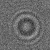

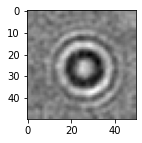

Gauss PSNR 29.35775117687455


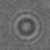

avg PSNR 27.82811736401755


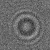

bilateral PSNR 49.55989206194396


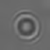

bm3d PSNR 27.8265455992552
Original


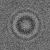

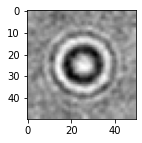

Gauss PSNR 29.520628092244085


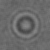

avg PSNR 28.057981987107226


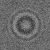

bilateral PSNR 49.7247248185862


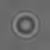

bm3d PSNR 27.93188102584455
Original


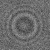

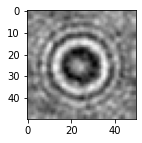

Gauss PSNR 29.626344038705973


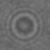

avg PSNR 28.116158951501767


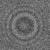

bilateral PSNR 49.69473888943399


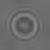

bm3d PSNR 27.748254833081475
Original


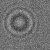

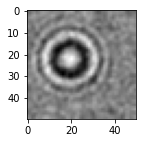

Gauss PSNR 29.371279979420024


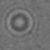

avg PSNR 27.860849812474548


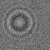

bilateral PSNR 49.88043919646557


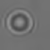

bm3d PSNR 27.85283023629685
Original


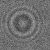

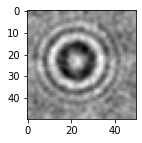

Gauss PSNR 29.29478763001509


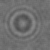

avg PSNR 27.80206322612349


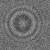

bilateral PSNR 49.97768317343551


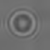

bm3d PSNR 27.72745076678833
Original


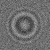

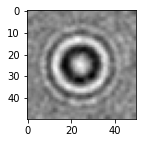

Gauss PSNR 29.37023941587258


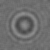

avg PSNR 27.887564731834537


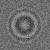

bilateral PSNR 49.81082683632014


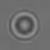

bm3d PSNR 27.961799711385446
Original


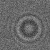

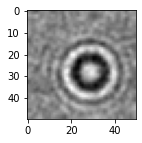

Gauss PSNR 29.519241490236197


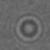

avg PSNR 28.007512170810763


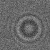

bilateral PSNR 49.75491922632399


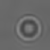

bm3d PSNR 27.86778913045651
Original


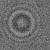

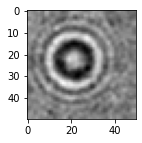

Gauss PSNR 29.518658656209702


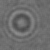

avg PSNR 27.96978119859186


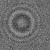

bilateral PSNR 49.81082683632014


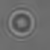

bm3d PSNR 27.881042738029844
Original


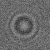

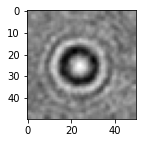

Gauss PSNR 29.60688374373281


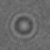

avg PSNR 28.0763291335349


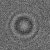

bilateral PSNR 49.69972218868303


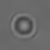

bm3d PSNR 27.848569687364808
Original


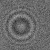

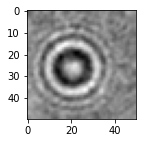

Gauss PSNR 29.373030770370892


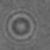

avg PSNR 27.858573912694578


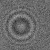

bilateral PSNR 50.00434344634791


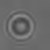

bm3d PSNR 27.83929661256358
Original


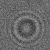

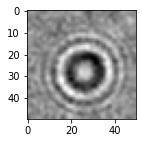

Gauss PSNR 29.23934950433788


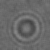

avg PSNR 27.728866616391898


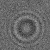

bilateral PSNR 49.86228413047266


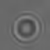

bm3d PSNR 27.659971778409282
Original


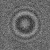

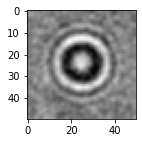

Gauss PSNR 29.437596096019636


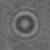

avg PSNR 27.916901301548663


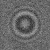

bilateral PSNR 49.75491922632399


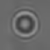

bm3d PSNR 27.94933372366615
Original


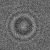

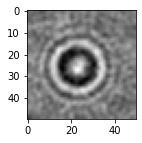

Gauss PSNR 29.524190117784542


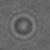

avg PSNR 28.03524515423099


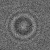

bilateral PSNR 49.52143740167816


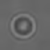

bm3d PSNR 27.83272433016244
Original


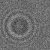

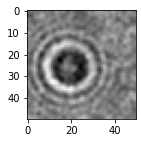

Gauss PSNR 29.487433061708458


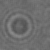

avg PSNR 27.99171779530483


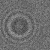

bilateral PSNR 49.94854467253955


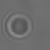

bm3d PSNR 27.653326112149323
Original


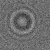

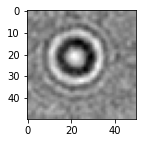

Gauss PSNR 29.67075710388757


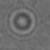

avg PSNR 28.173318651724408


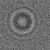

bilateral PSNR 49.67238453446153


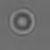

bm3d PSNR 27.975039580828952
Original


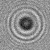

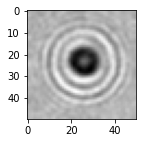

Gauss PSNR 27.644223889030645


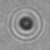

avg PSNR 25.882578707533487


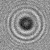

bilateral PSNR 50.630350488561426


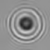

bm3d PSNR 28.330871127193056
Original


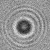

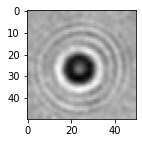

Gauss PSNR 27.91523907548459


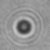

avg PSNR 26.22384993852136


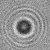

bilateral PSNR 50.26612884127627


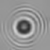

bm3d PSNR 27.9890540175902
Original


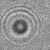

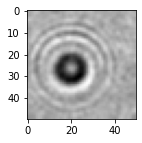

Gauss PSNR 28.61145468212615


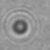

avg PSNR 27.00525460913244


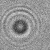

bilateral PSNR 49.98566408499671


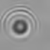

bm3d PSNR 27.729113847254364
Original


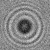

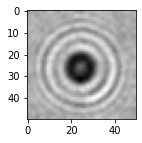

Gauss PSNR 27.863627825037298


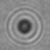

avg PSNR 26.12293384007809


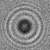

bilateral PSNR 50.21810879957641


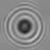

bm3d PSNR 28.40047752045837
Original


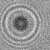

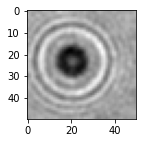

Gauss PSNR 27.884425767919407


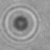

avg PSNR 26.133215361267514


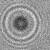

bilateral PSNR 50.53865929633666


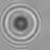

bm3d PSNR 28.324751831314853
Original


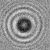

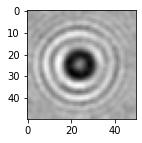

Gauss PSNR 27.49383601363536


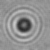

avg PSNR 25.695235381919122


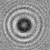

bilateral PSNR 50.58426291612478


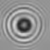

bm3d PSNR 28.50461639746646
Original


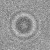

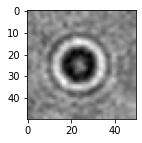

Gauss PSNR 29.308977825417244


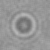

avg PSNR 27.812133992447787


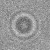

bilateral PSNR 49.83647927250311


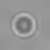

bm3d PSNR 27.615528618164113
Original


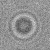

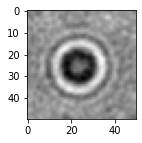

Gauss PSNR 29.260185684149818


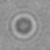

avg PSNR 27.761418572029246


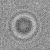

bilateral PSNR 49.61822012148835


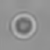

bm3d PSNR 27.630386645685867
Original


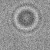

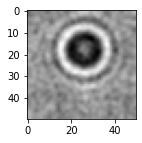

Gauss PSNR 29.422895851664315


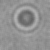

avg PSNR 27.897924566397435


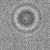

bilateral PSNR 49.79550779109267


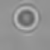

bm3d PSNR 27.844124918371
Original


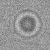

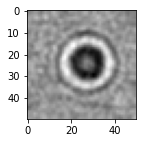

Gauss PSNR 29.47626875906501


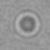

avg PSNR 27.969123572706902


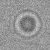

bilateral PSNR 49.749872224223125


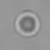

bm3d PSNR 27.815630143805095
Original


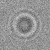

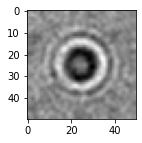

Gauss PSNR 29.355177849888356


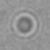

avg PSNR 27.842178618305667


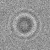

bilateral PSNR 49.72974266411153


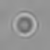

bm3d PSNR 27.632152080779942
Original


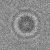

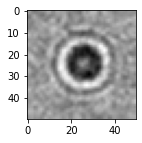

Gauss PSNR 29.13783068242568


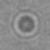

avg PSNR 27.685210370008477


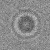

bilateral PSNR 49.85711087814085


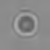

bm3d PSNR 27.449029650205144
Original


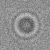

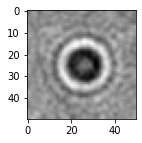

Gauss PSNR 29.51869379369668


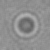

avg PSNR 28.022630713608446


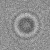

bilateral PSNR 49.61332941734646


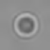

bm3d PSNR 27.84494744418241
Original


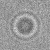

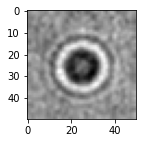

Gauss PSNR 29.120261847712214


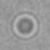

avg PSNR 27.654696593703175


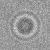

bilateral PSNR 49.849362535641234


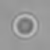

bm3d PSNR 27.4445254398034
Original


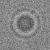

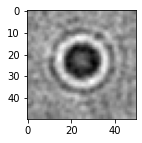

Gauss PSNR 29.555492348867105


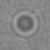

avg PSNR 28.020235497285015


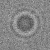

bilateral PSNR 49.69722982429954


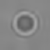

bm3d PSNR 27.761538133311397
Original


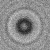

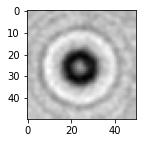

Gauss PSNR 29.262730709022296


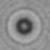

avg PSNR 27.72304826921763


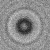

bilateral PSNR 49.757444928528955


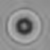

bm3d PSNR 28.017454472858034
Original


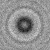

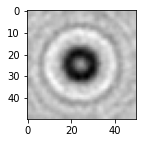

Gauss PSNR 29.347081925930393


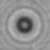

avg PSNR 27.834789125071882


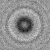

bilateral PSNR 49.73979578160757


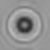

bm3d PSNR 28.047766915457583
Original


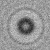

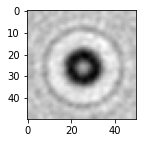

Gauss PSNR 29.262767547259298


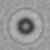

avg PSNR 27.693615878059575


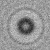

bilateral PSNR 49.8442046433259


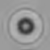

bm3d PSNR 27.855927019886373
Original


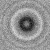

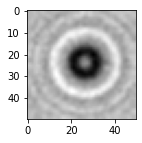

Gauss PSNR 28.95447064309444


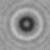

avg PSNR 27.42138182487009


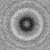

bilateral PSNR 49.940631621788505


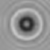

bm3d PSNR 27.973584259624076
Original


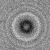

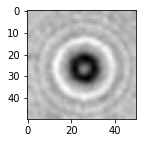

Gauss PSNR 29.44350880863211


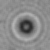

avg PSNR 27.891197890485802


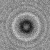

bilateral PSNR 49.66001498802194


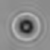

bm3d PSNR 27.958943141396514
Original


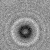

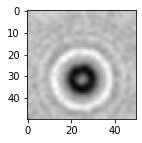

Gauss PSNR 29.269471635718535


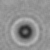

avg PSNR 27.742250706813934


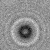

bilateral PSNR 50.020418522636945


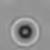

bm3d PSNR 27.77744343093739
Original


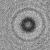

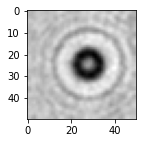

Gauss PSNR 29.09695962283035


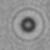

avg PSNR 27.557202639150695


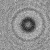

bilateral PSNR 50.00701849713715


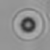

bm3d PSNR 27.5958716130277
Original


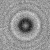

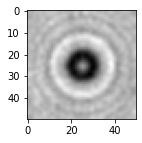

Gauss PSNR 29.17033370896368


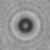

avg PSNR 27.636703610944295


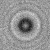

bilateral PSNR 50.02579013101381


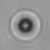

bm3d PSNR 27.679103762162466
Original


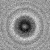

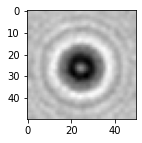

Gauss PSNR 29.154108553030444


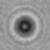

avg PSNR 27.59160494991462


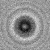

bilateral PSNR 49.890847697119426


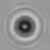

bm3d PSNR 28.013235188055692
Original


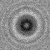

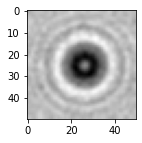

Gauss PSNR 29.336114733488678


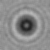

avg PSNR 27.841390043255345


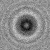

bilateral PSNR 49.93273296277154


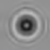

bm3d PSNR 27.936176212908748
Original


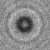

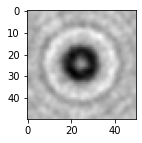

Gauss PSNR 29.654334830811212


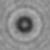

avg PSNR 28.16144712617083


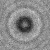

bilateral PSNR 49.79805721577347


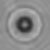

bm3d PSNR 28.276518986911046
Original


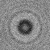

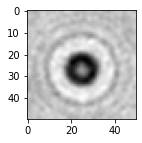

Gauss PSNR 29.484168724903007


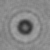

avg PSNR 27.985159585553934


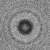

bilateral PSNR 49.72723301664554


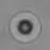

bm3d PSNR 27.773899025347788
Original


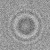

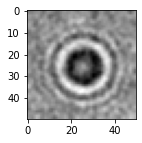

Gauss PSNR 29.594306371226516


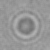

avg PSNR 28.12122836825857


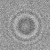

bilateral PSNR 49.81338527222272


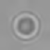

bm3d PSNR 27.843124432625018
Original


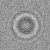

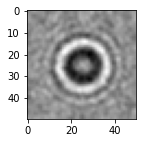

Gauss PSNR 29.494901434123904


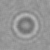

avg PSNR 27.93137013610589


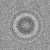

bilateral PSNR 49.52143740167816


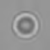

bm3d PSNR 27.941564312964783
Original


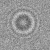

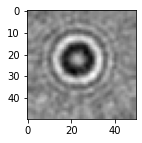

Gauss PSNR 29.36399801283876


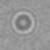

avg PSNR 27.77301830581223


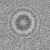

bilateral PSNR 49.571979308318745


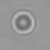

bm3d PSNR 27.624475586706517
Original


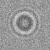

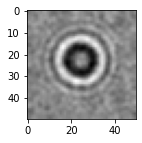

Gauss PSNR 29.58496252600687


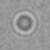

avg PSNR 27.96249175891775


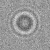

bilateral PSNR 49.61822012148835


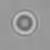

bm3d PSNR 28.063566085701215
Original


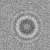

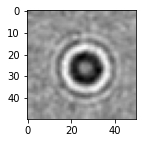

Gauss PSNR 29.54070852779666


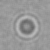

avg PSNR 27.999572479283525


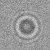

bilateral PSNR 49.57924783690916


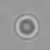

bm3d PSNR 28.00228946680809
Original


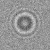

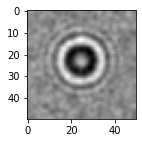

Gauss PSNR 29.331672852531288


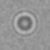

avg PSNR 27.771524433380563


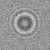

bilateral PSNR 49.772630065744366


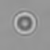

bm3d PSNR 27.7350377711075
Original


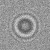

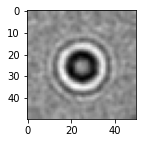

Gauss PSNR 29.216525228375062


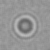

avg PSNR 27.656430765886885


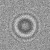

bilateral PSNR 49.927475159685


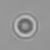

bm3d PSNR 27.890124653910426
Original


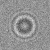

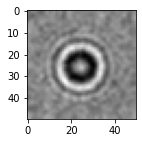

Gauss PSNR 29.220914695705154


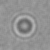

avg PSNR 27.657240102932967


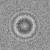

bilateral PSNR 49.53341794670763


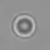

bm3d PSNR 27.826568634141022
Original


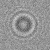

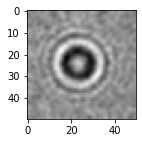

Gauss PSNR 29.465751310001824


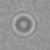

avg PSNR 27.94325338600329


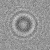

bilateral PSNR 49.603564500767035


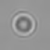

bm3d PSNR 27.840432805944452
Original


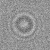

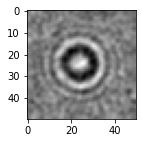

Gauss PSNR 29.590486219812252


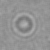

avg PSNR 28.082722009357695


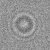

bilateral PSNR 49.57440079977765


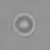

bm3d PSNR 27.75711119038814
Original


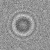

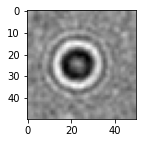

Gauss PSNR 29.345110034448165


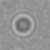

avg PSNR 27.85015822553824


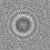

bilateral PSNR 49.593821490917364


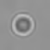

bm3d PSNR 27.70228515556061
Original


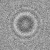

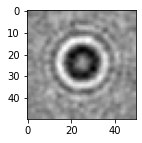

Gauss PSNR 29.403293008186075


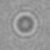

avg PSNR 27.90639702160815


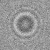

bilateral PSNR 49.57924783690916


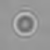

bm3d PSNR 27.624927731710137
Original


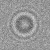

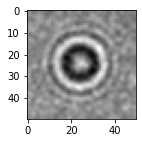

Gauss PSNR 29.384121874763444


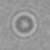

avg PSNR 27.846557908969785


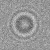

bilateral PSNR 49.9248486432342


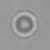

bm3d PSNR 27.700860933494855
Original


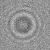

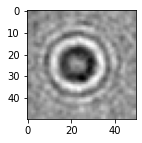

Gauss PSNR 29.393830053873064


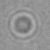

avg PSNR 27.88538083830835


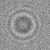

bilateral PSNR 49.772630065744366


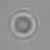

bm3d PSNR 27.716721118100175
Original


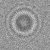

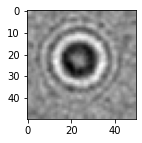

Gauss PSNR 29.41819942041233


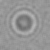

avg PSNR 27.924525065707183


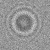

bilateral PSNR 49.61822012148835


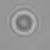

bm3d PSNR 27.818916008589504
Original


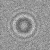

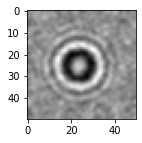

Gauss PSNR 29.535527031144795


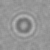

avg PSNR 28.011941469125507


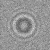

bilateral PSNR 49.73476631397073


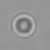

bm3d PSNR 27.87565124485408
Original


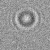

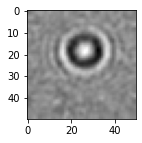

Gauss PSNR 29.3986288142342


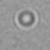

avg PSNR 27.822749947892138


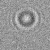

bilateral PSNR 49.8674635524569


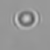

bm3d PSNR 27.789991591316195
Original


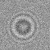

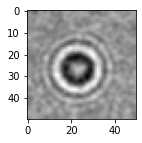

Gauss PSNR 29.401866662289006


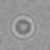

avg PSNR 27.824960965437246


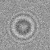

bilateral PSNR 49.68976130170397


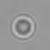

bm3d PSNR 27.818060366502703
Original


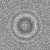

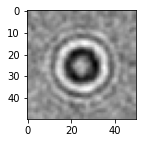

Gauss PSNR 29.429897274847946


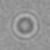

avg PSNR 27.92796080412725


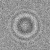

bilateral PSNR 49.642756598161064


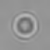

bm3d PSNR 27.823101885646707
Original


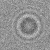

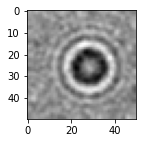

Gauss PSNR 29.356179000644858


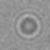

avg PSNR 27.834779814688495


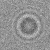

bilateral PSNR 49.927475159685


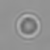

bm3d PSNR 27.552176077055243
Original


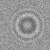

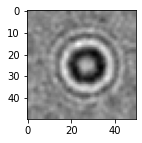

Gauss PSNR 29.49057707333499


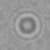

avg PSNR 27.989803270248295


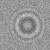

bilateral PSNR 49.70221598422617


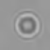

bm3d PSNR 27.851922686334667
Original


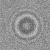

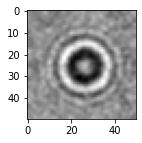

Gauss PSNR 29.417186402032563


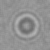

avg PSNR 27.87223700955966


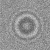

bilateral PSNR 49.97768317343551


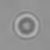

bm3d PSNR 27.851089608597107
Original


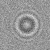

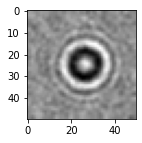

Gauss PSNR 29.206697589112874


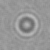

avg PSNR 27.668850025563458


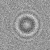

bilateral PSNR 49.787868484252144


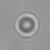

bm3d PSNR 27.676469357495638
Original


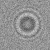

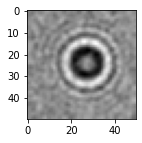

Gauss PSNR 29.191414751460023


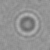

avg PSNR 27.62457324706132


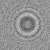

bilateral PSNR 49.82620010836943


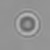

bm3d PSNR 27.6931297675886
Original


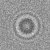

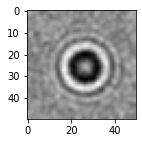

Gauss PSNR 29.357257702302782


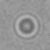

avg PSNR 27.738952534362866


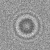

bilateral PSNR 49.588958170343034


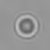

bm3d PSNR 27.80165067492551
Original


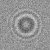

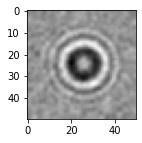

Gauss PSNR 29.194271357868637


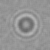

avg PSNR 27.611703794244672


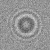

bilateral PSNR 49.94854467253955


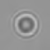

bm3d PSNR 27.78775915296174
Original


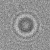

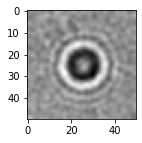

Gauss PSNR 29.409453343975763


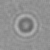

avg PSNR 27.829903154325248


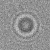

bilateral PSNR 49.66001498802194


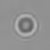

bm3d PSNR 27.779755229544847
Original


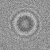

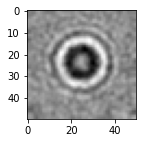

Gauss PSNR 29.451600144625214


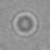

avg PSNR 27.91559027046382


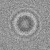

bilateral PSNR 49.83647927250311


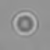

bm3d PSNR 27.85725196834416
Original


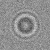

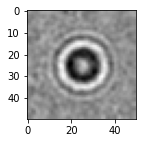

Gauss PSNR 29.301716538828725


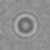

avg PSNR 27.80963543161482


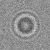

bilateral PSNR 49.69972218868303


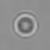

bm3d PSNR 27.855729971040763
Original


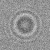

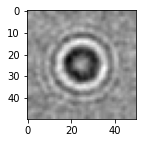

Gauss PSNR 29.489844126541872


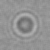

avg PSNR 27.973888144970203


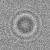

bilateral PSNR 49.849362535641234


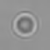

bm3d PSNR 27.80882244627882


In [31]:

noise_test_out = np.array(x_list)
print(noise_test_out.shape[0])
noise_test = []
for j in range(noise_test_out.shape[0]):
  #print(j)
  noise_test.append(noisy(np.reshape(noise_test_out[j],(sz,sz))).flatten())
noise_test = np.array(noise_test)

recon=[]
for each in noise_test:
  each.resize(sz,sz)
  each.shape
  recon.append(noise_removal(each))
  # plt.figure(figsize=(2,2))
  # plt.imshow(np.resize(den,(sz,sz)),cmap="gray")
  # plt.show()
    


In [32]:
np.asarray(recon).shape

(74, 4, 50, 50)

In [ ]:
import scipy
import matplotlib.pyplot as plt

#print(noise_test.shape)
#x_test=np.true_divide(noise_test,255)
#print(x_test.shape)
# recon = []
for j in range(noise_test.shape[0]):
#   y1=np.matmul(w1,noise_test[j])
#   #print("y1-",y1)
#   theta1=relu(y1)
#   #print("theta3-",theta3)
#   out=np.matmul(w2,theta1)
#   #print(out)
#   theta2=relu(out)
#   recon.append(theta2)
            
  if(j%1==0):
    print("orig")
    #plt.figure(figsize=(3,3))
    #plt.imshow(np.resize(np.multiply(noise_test[j],255),(44,44)), origin="upper",cmap="gray")
    #plt.show()
    plt.figure(figsize=(2,2))
    plt.imshow(np.resize(recon[j][0],(sz,sz)),cmap="gray")
    plt.imsave("drive/My Drive/elma/gaus/gaus "+str(train_x_list[j].split('/')[-2]+train_x_list[j].split('/')[-1])+".png",np.resize(recon[j][0],(sz,sz)),cmap='gray')
    plt.show()
    plt.figure(figsize=(2,2))
    plt.imshow(np.resize(recon[j][1],(sz,sz)),cmap="gray")
    plt.imsave("drive/My Drive/elma/avg/avg  "+str(train_x_list[j].split('/')[-2]+train_x_list[j].split('/')[-1])+".png",np.resize(recon[j][1],(sz,sz)),cmap='gray')
    plt.show()
    plt.figure(figsize=(2,2))
    plt.imshow(np.resize(recon[j][3],(sz,sz)),cmap="gray")
    plt.imsave("drive/My Drive/elma/bilat/bilat "+str(train_x_list[j].split('/')[-2]+train_x_list[j].split('/')[-1])+".png",np.resize(recon[j][3],(sz,sz)),cmap='gray')
    plt.show()
    plt.figure(figsize=(2,2))
    plt.imshow(np.resize(recon[j][4],(sz,sz)),cmap="gray")
    plt.imsave("drive/My Drive/elma/mean/mean "+str(train_x_list[j].split('/')[-2]+train_x_list[j].split('/')[-1])+".png",np.resize(recon[j][4],(sz,sz)),cmap='gray')
    plt.show()
    plt.figure(figsize=(2,2))
    plt.imshow(np.resize(recon[j][5],(sz,sz)),cmap="gray")
    plt.imsave("drive/My Drive/elma/bmd/bmd "+str(train_x_list[j].split('/')[-2]+train_x_list[j].split('/')[-1])+".png",np.resize(recon[j][5],(sz,sz)),cmap='gray')
    plt.show()
    plt.figure(figsize=(2,2))
    plt.imshow(np.resize(noise_test[j],(sz,sz)),cmap="gray")
    plt.imsave("drive/My Drive/elma/elmnsy/elmnsy "+str(train_x_list[j].split('/')[-2]+train_x_list[j].split('/')[-1])+".png",np.resize(noise_test[j],(sz,sz)),cmap='gray')
    plt.show()
    print("expected")
    #plt.figure(figsize=(3,3))
    #plt.imshow(np.resize(np.multiply(noise_test_out[j],255),(44,44)), origin="upper",cmap="gray")
    #plt.show()
    plt.figure(figsize=(2,2))
    plt.imshow(np.resize(noise_test_out[j],(sz,sz)),cmap="gray")
    plt.imsave("drive/My Drive/elma/elminp/elminp "+str(train_x_list[j].split('/')[-2]+train_x_list[j].split('/')[-1])+".png",np.resize(noise_test_out[j],(sz,sz)),cmap='gray')
    plt.show()
    #cv2_imshow(np.resize(np.multiply(noise_test[j],255),(44,44)))
    # print("recon ")
    # #cv2_imshow(np.resize(np.multiply(theta2,255),(44,44)))
    # plt.figure(figsize=(2,2))
    # plt.imshow(np.resize(np.multiply(theta2,255),(sz,sz)),cmap="gray")
    # plt.imsave("drive/My Drive/elma/elmop/elmop"+str(j)+".png",np.resize(np.multiply(theta2,255),(44,44)),cmap='gray')
    # plt.show()

In [33]:
recon=np.array(recon)

In [34]:
recon.shape

(74, 4, 50, 50)

In [38]:
#a = noise_test_out
#b = np.true_divide(noise_test,255)
gs=[i[0] for i in recon]
avg=[i[1] for i in recon]
bilat=[i[2] for i in recon]
bmd=[i[3] for i in recon]
# Takes noisy normal and reconstructed images/ returns normalised images
def minmaxNorm(nsy,nor,rec):

  aa = []
  bb = []
  cc = []
  print(np.array(nsy).shape,np.array(nor).shape,np.array(rec).shape)
  for lk in range(nor.shape[0]):
    a = nor[lk]
    a  = (a - np.amin(a))/(np.amax(a)-np.amin(a))
    aa.append(a)
    b = nsy[lk]
    b  = (b - np.amin(b))/(np.amax(b)-np.amin(b))
    bb.append(b)
    c = rec[lk]
    #c = np.true_divide(recon,255)
    c  = (c - np.amin(c))/(np.amax(c)-np.amin(c))
    cc.append(c)
  aa = np.array(aa)
  bb = np.array(bb)
  cc = np.array(cc)
  return aa,bb,cc

gsa,gsb,gsc=minmaxNorm(noise_test,noise_test_out,gs)
avga,avgb,avgc=minmaxNorm(noise_test,noise_test_out,avg)
bilata,bilatb,bilatc=minmaxNorm(noise_test,noise_test_out,bilat)
bmda,bmdb,bmdc=minmaxNorm(noise_test,noise_test_out,bmd)

(74, 2500) (74, 2500) (74, 50, 50)
(74, 2500) (74, 2500) (74, 50, 50)
(74, 2500) (74, 2500) (74, 50, 50)
(74, 2500) (74, 2500) (74, 50, 50)


In [ ]:
!pip install xlsxwriter

In [ ]:
import xlsxwriter

new_list = [['first', 'second'], ['third', 'four'], [1, 2, 3, 4, 5, 6]]

with xlsxwriter.Workbook('test.xlsx') as workbook:
    worksheet = workbook.add_worksheet()

    for row_num, data in enumerate(new_list):
        worksheet.write_row(row_num, 0, data)

In [43]:
import math
import matplotlib.pyplot as pypt
def snr5(imgarr,noisarr,reconarr):
    imgar = []
    noisar  = []
    reconar = []
    snrfinal = []
    snr = []
    a = []
    b = []
    k = []
    l = []
    m = []
    snrinar = []
    snroutar = []
    for t in range(imgarr.shape[0]):
        imgar = imgarr[t].reshape(sz,sz)
        noisar = noisarr[t].reshape(sz,sz)
        reconar = reconarr[t].reshape(sz,sz)
        k = imgar[sz//2][:]
        l = noisar[sz//2][:]
        m = reconar[sz//2][:]
        a = np.subtract(k,l)
        b = np.subtract(k,m)
        diff1 = sum(map(lambda i : i * i, a))
        diff2 = sum(map(lambda i : i * i, b))
        img = sum(map(lambda i: i * i,imgar[sz//2][:]))
        snrin =  10 * math.log(img/diff1,10)
        snrout =  10 * math.log(img/diff2,10)
        snrimp = snrout - snrin
        #if(snrimp>0):
        snrfinal.append(snrimp)
        snrinar.append(snrin)
        snroutar.append(snrout)
        snr = []
        imgar = []
        noisar  = []
        reconar = []
    return snrfinal,snrinar,snroutar
def print_details(snratio,snrinar,snroutar):
  print("SNR 5")
  print("All Snr- ",snratio)
  print("SNR inp- ",snrinar)
  print("SNR out- ",snroutar)
  print("SNR mean- ",np.mean(snratio))
  print("SNR inp mean- ",np.mean(snrinar))
  print("SNR out mean- ",np.mean(snroutar))
  print("SNR standart deviation- ",np.std(snratio))
  print("SNR inp standart deviation- ",np.std(snrinar))
  print("SNR out standart deviation- ",np.std(snroutar))

snratio = []
snrinar = []
snroutar =  []
snratio,snrinar,snroutar = snr5(gsa,gsb,gsc)
print("Gaussian")
print_details(snratio,snrinar,snroutar)
snrlist=[["Gaussian"],["snratio"],snratio,["snrinar"],snrinar,["snroutar"],snroutar,["snratiomean",np.mean(snratio)],["snrinarmean",np.mean(snrinar)],["snroutarmean",np.mean(snroutar)],["snratiostd",np.std(snratio)],["snrinarstd",np.std(snrinar)],["snroutarstd",np.std(snroutar)]]

print("Average")
snratio,snrinar,snroutar= snr5(avga,avgb,avgc)
print_details(snratio,snrinar,snroutar)
snrlist.extend([["average"],["snratio"],snratio,["snrinar"],snrinar,["snroutar"],snroutar,["snratiomean",np.mean(snratio)],["snrinarmean",np.mean(snrinar)],["snroutarmean",np.mean(snroutar)],["snratiostd",np.std(snratio)],["snrinarstd",np.std(snrinar)],["snroutarstd",np.std(snroutar)]])

print("Bilateral")

snratio,snrinar,snroutar = snr5(bilata,bilatb,bilatc)
print_details(snratio,snrinar,snroutar)
snrlist.extend([["bilateral"],["snratio"],snratio,["snrinar"],snrinar,["snroutar"],snroutar,["snratiomean",np.mean(snratio)],["snrinarmean",np.mean(snrinar)],["snroutarmean",np.mean(snroutar)],["snratiostd",np.std(snratio)],["snrinarstd",np.std(snrinar)],["snroutarstd",np.std(snroutar)]])

print("bm3d")

snratio,snrinar,snroutar = snr5(bmda,bmdb,bmdc)
print_details(snratio,snrinar,snroutar)
snrlist.extend([["bm3d"],["snratio"],snratio,["snrinar"],snrinar,["snroutar"],snroutar,["snratiomean",np.mean(snratio)],["snrinarmean",np.mean(snrinar)],["snroutarmean",np.mean(snroutar)],["snratiostd",np.std(snratio)],["snrinarstd",np.std(snrinar)],["snroutarstd",np.std(snroutar)]])
print(snrlist)


Gaussian
SNR 5
All Snr-  [6.079616253937916, 2.098342576578508, 3.97844222893138, 4.400296347491619, 5.29873096482736, 4.509632472645743, 4.0370031589674475, 5.612415799712807, 3.8306423072150633, 4.797894736174873, 4.833436767919871, 3.4111090614547965, 4.083831803874855, 5.03576890794211, 4.823113379725067, 3.933293941901754, 4.140479142149335, -1.3613522807715732, 0.5673636070398942, 3.7186422388285862, -1.1160640777465183, 3.0891987111711217, 2.207940675423881, 0.9699500222221449, 6.95970214525353, 1.3559889246680434, 4.06991138663809, 4.0723614681676725, 4.921479656492988, 5.086986443346085, 4.291281659855045, 4.154995375365697, 2.923810628120819, 6.801106221634406, 5.798761417359902, 3.6999691972166353, 4.452113118070564, 2.674591294246383, 5.45194658275566, 8.05556064004098, 5.727375571613585, 5.301909673003067, 4.3230495932063455, 7.059140498724517, 3.526996160341877, 2.5504852294257443, 3.8966991615328244, 6.408126339322358, 2.723320396531342, 3.1703521292496593, 7.16659216024

In [ ]:
with xlsxwriter.Workbook('test.xlsx') as workbook:
    worksheet = workbook.add_worksheet()

    for row_num, data in enumerate(snrlist):
        worksheet.write_row(row_num, 0, data)